Creates a csv containing a,b,c,d,x_min,x_max. (f(x) = a + bx + cx^2 + dx^3 for x_min <= x <= x_max)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#used code from numerical methods lab 1 for Gaussian elimination

def GaussElim(x,y):
    n = len(x)
    A = np.zeros((n,n)) #Matrix
    d = np.zeros(n) #RHS vector, first and last are zero
    lam = np.zeros(n)
    mu = np.zeros(n)
    h = np.zeros(n)

    for i in range(1,n-1):
        h[i] = x[i]-x[i-1]

    A[0,0] = 2
    for i in range(1,n-1):
        A[i,i] = 2
        lam[i] = h[i+1]/(h[i]+h[i+1])
        mu[i] = h[i]/(h[i]+h[i+1])
        f1 = (y[i+1]-y[i])/(x[i+1]-x[i])
        f2 = (y[i]-y[i-1])/(x[i]-x[i-1])
        d[i] = 6*((f1-f2)/(x[i+1]-x[i-1]))
        A[i,i+1] = lam[i]
        A[i,i-1] = mu[i]
    A[n-1,n-1] = 2

    #code from lab:
    a = np.array(A).astype(float)
    b = np.array(d).astype(float) 
    b_orig = np.array(d)
    
    m, n = np.shape(a) 
    #Perform Gaussian Elimination
    for j in range(0,n-1):
        pivot = a[j,j]
        for i in range(j+1,n):
            multiplier = a[i,j]/pivot
            a[i,:] = a[i,:] - a[j,:]*multiplier
            b[i] = b[i] - b[j]*multiplier 
            
    #Perform Back Substitution 
    x = np.zeros((n,1)) 
    x[n-1] = b[n-1]/a[n-1,n-1] 
    
    for j in range(n-2, -1, -1):
        x[j] = (b[j] - np.dot(a[j,j+1:n], x[j+1:n]))/a[j,j] 
    return(x.flatten()) 

def Interpolate(x,y):
    M = GaussElim(x,y)
    Eqs = np.zeros((len(x)-1,6))
    h = np.zeros(len(x))
    for i in range(1,len(x)-1):
        h[i] = x[i]-x[i-1]
    #Eq = a + bx + cx^2 +dx^3
    for i in range(1,len(x)-1):
        a = (M[i-1]*x[i]**3-M[i]*x[i-1]**3)/(6*h[i]) + (h[i]*(M[i]*x[i-1]-M[i-1]*x[i]))/6 + (y[i-1]*x[i]-y[i]*x[i-1])/h[i]
        b = (M[i]*x[i-1]**2-M[i-1]*x[i]**2)/(2*h[i]) + (h[i]*(M[i-1]-M[i]))/6 + (y[i]-y[i-1])/h[i]
        c = (M[i-1]*x[i]-M[i]*x[i-1])/(2*h[i])
        d = (M[i]-M[i-1])/(6*h[i])
        Eqs[i] = [a,b,c,d,x[i-1],x[i]]
    Eqs = Eqs[1: , :]
    return Eqs
    

In [5]:
data = np.loadtxt("SLy4.dat", delimiter=" ")

rho = data[ : , 2]
P = data[ : ,3]

In [6]:
Eqs = Interpolate(rho,P)
np.savetxt("SLy4_coefficients.csv",Eqs,delimiter=",")

In [ ]:
coeffs = np.loadtxt("SLy4_coefficients.csv", delimiter=",")
a = coeffs[ :, 0] #
b = coeffs[ : ,1] #coeff of x
c = coeffs[ : ,2] #/// x^2
d = coeffs[ : ,3] #/// x^3
x_min = coeffs[ : ,4]
x_max = coeffs[ : ,5]


for i in range(1,len(a)-1):
    y1 = a[i]+b[i]*x_min[i]+c[i]*x_min[i]**2+d[i]*x_min[i]**3
    y2 = a[i]+b[i]*x_max[i]+c[i]*x_max[i]**2+d[i]*x_max[i]**3
    plt.plot((x_min[i],x_max[i]),(y1,y2),"r-")

plt.plot(rho,P)
plt.show()

In [7]:
data = np.loadtxt("NPS.dat", delimiter=" ")

rho = data[ : , 0]
P = data[ : ,1]

Eqs = Interpolate(rho,P)
np.savetxt("NPS_coefficients.csv",Eqs,delimiter=",")

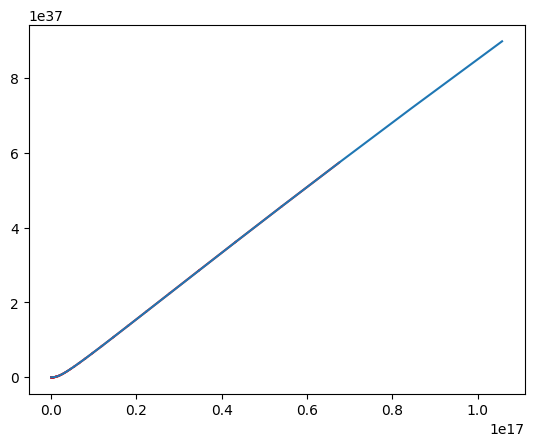

In [8]:
coeffs = np.loadtxt("NPS_coefficients.csv", delimiter=",")
a = coeffs[ :, 0] #
b = coeffs[ : ,1] #coeff of x
c = coeffs[ : ,2] #/// x^2
d = coeffs[ : ,3] #/// x^3
x_min = coeffs[ : ,4]
x_max = coeffs[ : ,5]


for i in range(1,len(a)-1):
    y1 = a[i]+b[i]*x_min[i]+c[i]*x_min[i]**2+d[i]*x_min[i]**3
    y2 = a[i]+b[i]*x_max[i]+c[i]*x_max[i]**2+d[i]*x_max[i]**3
    plt.plot((x_min[i],x_max[i]),(y1,y2),"r-")

plt.plot(rho,P)
plt.show()